## fill nan

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from astropy.time import Time 
namelist = ['2003MA3','2010CO1','2010DG77','2010EX11','2010FC81','2010FH81','2010GS7','2010JN71','2010KX7','2010PW58','2010XP69','2019DD2']
nlist = ['1994cb','1996gq','2002lt24', '2008np3', '2009ux17' ,'2010aj30', '2010bh115' ,'2010ca55' ,'2010cc55' ,'2010cn141','2010dh77' ,'2010fa81' ,'2010gp67' ,'2010hw81' ,'2010hx107', '2010hz104' ,'2010jx16', '2010kp10' ,'2010ku7' ,'2010lh14' ,'2010lj68' ,'2010lk68' ,'2010ll68' ,'2010lv108' ,'2010ns36', '2010ny65', '2010oh126', '2010pu66' ,'2014fd7' ,'2015tf' ,'2016uh101']
alist = namelist + nlist

In [2]:
name = alist[0].lower()
print(name)
rawdata = pd.read_csv(f'./wisecsv/{name}.csv')
rawdata = rawdata.loc[:,['mjd','w1mpro','w1sigmpro','w2mpro','w2sigmpro','w3mpro','w3sigmpro','w4mpro','w4sigmpro','ph_qual','sso_flg']]
rawdata.insert(loc=len(rawdata.columns),column='tdbjd',value='no')
rawdata.insert(loc=len(rawdata.columns),column='tdbmjd',value='no')
#rawdata['mjd'] = 2400000.5+rawdata['mjd']
for i in tqdm(range(len(rawdata))):  
    t = Time(rawdata['mjd'][i],format='mjd',scale='utc')
    t.format = 'iso'
    rawdata['tdbjd'][i] = t.tdb.jd
    rawdata['tdbmjd'][i] = t.tdb.mjd
rawdata
data = rawdata.loc[:,['tdbjd','w1mpro','w1sigmpro','w2mpro','w2sigmpro','w3mpro','w3sigmpro','w4mpro','w4sigmpro']]
data1234 = data.loc[:,['w1mpro','w1sigmpro','w2mpro','w2sigmpro','w3mpro','w3sigmpro','w4mpro','w4sigmpro']]
data1234[:5]

2003ma3


  0%|          | 0/8 [00:00<?, ?it/s]/tmp/ipykernel_4085516/2074901001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['tdbjd'][i] = t.tdb.jd
/tmp/ipykernel_4085516/2074901001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['tdbmjd'][i] = t.tdb.mjd
100%|██████████| 8/8 [00:00<00:00, 92.40it/s]


,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro
0,12.717,0.029,12.844,0.055,10.859,0.344,7.791,NaN
1,13.366,0.048,14.293,0.194,11.076,NaN,6.999,0.365
2,14.639,0.088,15.108,0.438,11.271,NaN,7.775,NaN
3,14.801,0.103,14.719,NaN,10.571,NaN,7.226,NaN
4,15.575,0.192,14.947,NaN,10.076,NaN,6.937,0.238


In [3]:
data1234.insert(loc=len(data1234.columns),column='w1nan',value=0)
data1234.insert(loc=len(data1234.columns),column='w2nan',value=0)
data1234.insert(loc=len(data1234.columns),column='w3nan',value=0)
data1234.insert(loc=len(data1234.columns),column='w4nan',value=0)
data1234[:5]     

,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro,w1nan,w2nan,w3nan,w4nan
0,12.717,0.029,12.844,0.055,10.859,0.344,7.791,NaN,0,0,0,0
1,13.366,0.048,14.293,0.194,11.076,NaN,6.999,0.365,0,0,0,0
2,14.639,0.088,15.108,0.438,11.271,NaN,7.775,NaN,0,0,0,0
3,14.801,0.103,14.719,NaN,10.571,NaN,7.226,NaN,0,0,0,0
4,15.575,0.192,14.947,NaN,10.076,NaN,6.937,0.238,0,0,0,0


In [4]:
datafill = data1234.fillna(method='ffill').fillna(method='bfill')
datafill[:5]

,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro,w1nan,w2nan,w3nan,w4nan
0,12.717,0.029,12.844,0.055,10.859,0.344,7.791,0.365,0,0,0,0
1,13.366,0.048,14.293,0.194,11.076,0.344,6.999,0.365,0,0,0,0
2,14.639,0.088,15.108,0.438,11.271,0.344,7.775,0.365,0,0,0,0
3,14.801,0.103,14.719,0.438,10.571,0.344,7.226,0.365,0,0,0,0
4,15.575,0.192,14.947,0.438,10.076,0.344,6.937,0.238,0,0,0,0


## M2Flux


In [5]:
#-------initial para-------------------------
#Fv0 of W1 ,W2, W3, W4
Fv0 = [-1,306.682,170.663,29.045,8.284]
#Color corrections  Col[Bv=1:8=(100,141,200,283,400,566,800,1131),fc=1:4=(W1,W2,W3,W4)]
Fc0 = np.zeros((1,8))#W1,W2,W3,W4
Fc1 = np.array([-1,17.2062,3.9096,2.6588,1.0032]) #Bv=100
Fc2 = np.array([-1,4.0882,1.9739,1.4002,0.9852])  #Bv=141
Fc3 = np.array([-1,2.0577,1.3448,1.0006,0.9833])  #Bv=200
Fc4 = np.array([-1,1.3917,1.1124,0.8791,0.9865])  #Bv=283
Fc5 = np.array([-1,1.1316,1.0229,0.8622,0.9903])  #Bv=400
Fc6 = np.array([-1,1.0263,0.9919,0.8833,0.9935])  #Bv=566
Fc7 = np.array([-1,0.9884,0.9853,0.9125,0.9958])  #Bv=800
Fc8 = np.array([-1,0.9801,0.9877,0.9386,0.9975])  #Bv=1131
Fc = [Fc0,Fc1,Fc2,Fc3,Fc4,Fc5,Fc6,Fc7,Fc8]
Fc = np.array(Fc)
Bv = 4
Const = np.array([-1,Fv0[1],Fv0[2],Fv0[3],Fv0[4]])
def h2flux(Fconst,dat_H):
    return Fconst*np.power(10,-dat_H/2.5)*1000

/tmp/ipykernel_4085516/3900039758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Fc = np.array(Fc)


In [6]:
#data of W1,W2,W3,W4
dat_w1 = np.array(datafill['w1mpro'])
#dat_w1= np.hstack([dat_w1,dat_w1*0.1])
dat_w2 = np.array(datafill['w2mpro'])
#dat_w2= np.hstack([dat_w2,dat_w2*0.1])
dat_w3 = np.array(datafill['w3mpro'])
#dat_w3= np.hstack([dat_w3,dat_w3*0.1])
dat_w4 = np.array(datafill['w4mpro'])
#dat_w4= np.hstack([dat_w4,dat_w4*0.1])
#dat w1
dat_fluxw1 = dat_w1
dat_fluxw1 = Const[1]*np.power(10,-dat_w1/2.5)*1000 
#dat w2
dat_fluxw2 = dat_w2
dat_fluxw2 = Const[2]*np.power(10,-dat_w2/2.5)*1000 
#dat w3
dat_fluxw3 = dat_w3
dat_fluxw3 = Const[3]*np.power(10,-dat_w3/2.5)*1000 
#print(f'{Const[1]}*{np.power(10,-dat_w3[0]/2.5)}*1000={dat_fluxw3[0]}')
#dat w4
dat_fluxw4 = dat_w4
dat_fluxw4 = Const[4]*np.power(10,-dat_w4/2.5)*1000 
dat234 = np.concatenate([dat_fluxw2,dat_fluxw3,dat_fluxw4],axis=0)
#np.savetxt(f'obs.txt.{name}',dat234)
dat1234 = np.concatenate([dat_fluxw1,dat_fluxw2,dat_fluxw3,dat_fluxw4],axis=0)
np.savetxt(f'obsNEW.txt.{name}',dat1234)
dat1234[:5]

array([2.51124038, 1.38130087, 0.42764981, 0.36837342, 0.18058775])

### old err

In [7]:
dat_err1 = np.array(datafill['w1sigmpro'])
err1 = dat_err1
err1 = Const[1]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w1-1))*1000*dat_err1
err1 = abs(err1)
dat_err2 = np.array(datafill['w2sigmpro'])
err2 = dat_err2
err2 = Const[2]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w2-1))*1000*dat_err2
err2 = abs(err2)
dat_err3 = np.array(datafill['w3sigmpro'])
err3 = dat_err3
err3 = Const[3]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w3-1))*1000*dat_err3
err3 = abs(err3)
dat_err4 = np.array(datafill['w1sigmpro'])
err4 = dat_err4
err4 = Const[4]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w4-1))*1000*dat_err4
err4 = abs(err4)
daterr = np.concatenate([err1,err2,err3,err4],axis=0)
np.savetxt(f'obsNEWerr.txt.{name.upper()}',daterr)
name

'2003ma3'

### new err

#### + err

In [8]:
# err+
#data of W1,W2,W3,W4
dat_w1err = np.array(datafill['w1mpro'])+np.array(datafill['w1sigmpro'])
#dat_w1err= np.hstack([dat_w1err,dat_w1err*0.1])
dat_w2err = np.array(datafill['w2mpro'])+np.array(datafill['w2sigmpro'])
#dat_w2err= np.hstack([dat_w2err,dat_w2err*0.1])
dat_w3err = np.array(datafill['w3mpro'])+np.array(datafill['w3sigmpro'])
#dat_w3err= np.hstack([dat_w3err,dat_w3err*0.1])
dat_w4err = np.array(datafill['w4mpro'])+np.array(datafill['w4sigmpro'])
#dat_w4err= np.hstack([dat_w4err,dat_w4err*0.1])
#dat w1
dat_fluxw1err = dat_w1err
dat_fluxw1err = Const[1]*np.power(10,-dat_w1err/2.5)*1000
dat_fluxw1err = abs(dat_fluxw1- dat_fluxw1err)
#dat w2
dat_fluxw2err = dat_w2err
dat_fluxw2err = Const[2]*np.power(10,-dat_w2err/2.5)*1000 
dat_fluxw2err = abs(dat_fluxw2- dat_fluxw2err)
#dat w3
dat_fluxw3err = dat_w3err
dat_fluxw3err = Const[3]*np.power(10,-dat_w3err/2.5)*1000 
dat_fluxw3err = abs(dat_fluxw3- dat_fluxw3err)
#print(f'{Const[1]}*{np.power(10,-dat_w3[0]/2.5)}*1000={dat_fluxw3err[0]}')
#dat w4
dat_fluxw4err = dat_w4err
dat_fluxw4err = Const[4]*np.power(10,-dat_w4err/2.5)*1000 
dat_fluxw4err = abs(dat_fluxw4- dat_fluxw4err)
dat234err = np.concatenate([dat_fluxw2err,dat_fluxw3err,dat_fluxw4err],axis=0)
#np.savetxt(f'obs.txt.{name}',dat234)
dat1234err = np.concatenate([dat_fluxw1err,dat_fluxw2err,dat_fluxw3err,dat_fluxw4err],axis=0)
np.savetxt(f'obsNEWerrNew.txt.{name}',dat1234err)
dat1234[:5]

array([2.51124038, 1.38130087, 0.42764981, 0.36837342, 0.18058775])

#### -err

In [9]:
#err-
#data of W1,W2,W3,W4
dat_w1err2 = np.array(datafill['w1mpro'])-np.array(datafill['w1sigmpro'])
#dat_w1err2= np.hstack([dat_w1err2,dat_w1err2*0.1])
dat_w2err2 = np.array(datafill['w2mpro'])-np.array(datafill['w2sigmpro'])
#dat_w2err2= np.hstack([dat_w2err2,dat_w2err2*0.1])
dat_w3err2 = np.array(datafill['w3mpro'])-np.array(datafill['w3sigmpro'])
#dat_w3err2= np.hstack([dat_w3err2,dat_w3err2*0.1])
dat_w4err2 = np.array(datafill['w4mpro'])-np.array(datafill['w4sigmpro'])
#dat_w4err2= np.hstack([dat_w4err2,dat_w4err2*0.1])
#dat w1
dat_fluxw1err2 = dat_w1err2
dat_fluxw1err2 = Const[1]*np.power(10,-dat_w1err2/2.5)*1000
dat_fluxw1err2 = abs(dat_fluxw1- dat_fluxw1err2)
#dat w2
dat_fluxw2err2 = dat_w2err2
dat_fluxw2err2 = Const[2]*np.power(10,-dat_w2err2/2.5)*1000 
dat_fluxw2err2 = abs(dat_fluxw2- dat_fluxw2err2)
#dat w3
dat_fluxw3err2 = dat_w3err2
dat_fluxw3err2 = Const[3]*np.power(10,-dat_w3err2/2.5)*1000 
dat_fluxw3err2 = abs(dat_fluxw3- dat_fluxw3err2)
#print(f'{Const[1]}*{np.power(10,-dat_w3[0]/2.5)}*1000={dat_fluxw3err2[0]}')
#dat w4
dat_fluxw4err2 = dat_w4err2
dat_fluxw4err2 = Const[4]*np.power(10,-dat_w4err2/2.5)*1000 
dat_fluxw4err2 = abs(dat_fluxw4- dat_fluxw4err2)
dat234err2 = np.concatenate([dat_fluxw2err2,dat_fluxw3err2,dat_fluxw4err2],axis=0)
#np.savetxt(f'obs.txt.{name}',dat234)
dat1234err2 = np.concatenate([dat_fluxw1err2,dat_fluxw2err2,dat_fluxw3err2,dat_fluxw4err2],axis=0)
np.savetxt(f'obsNEWerr2New.txt.{name}',dat1234err2)

#### cal err/y

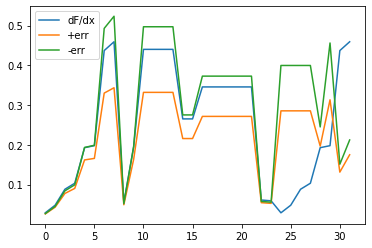

In [10]:
err0y = daterr/dat1234
err1y = dat1234err/dat1234
err2y = dat1234err2/dat1234
plt.plot(err0y,label='dF/dx')
plt.plot(err1y,label='+err')
plt.plot(err2y,label='-err')
plt.legend()

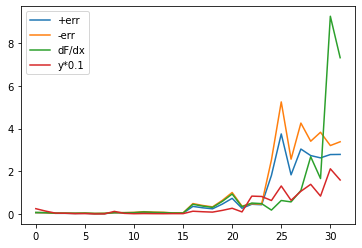

In [11]:
plt.plot(dat1234err,label='+err')
plt.plot(dat1234err2,label='-err')
plt.plot(daterr,label='dF/dx')
#plt.plot(dat1234)
plt.plot(dat1234*0.1,label='y*0.1')
plt.legend()

In [14]:

for i in range(len(alist)):
    namei = alist[i]
    rawdata = pd.read_csv(f'./wisecsv/{namei.lower()}.csv')
    rawdata = rawdata.loc[:,['mjd','w1mpro','w1sigmpro','w2mpro','w2sigmpro','w3mpro','w3sigmpro','w4mpro','w4sigmpro','ph_qual','sso_flg']]
    rawdata.insert(loc=len(rawdata.columns),column='tdbjd',value='no')
    rawdata.insert(loc=len(rawdata.columns),column='tdbmjd',value='no')
    #rawdata['mjd'] = 2400000.5+rawdata['mjd']
    for i in tqdm(range(len(rawdata))):  
        t = Time(rawdata['mjd'][i],format='mjd',scale='utc')
        t.format = 'iso'
        rawdata['tdbjd'][i] = t.tdb.jd
        rawdata['tdbmjd'][i] = t.tdb.mjd
    rawdata
    data = rawdata.loc[:,['tdbjd','w1mpro','w1sigmpro','w2mpro','w2sigmpro','w3mpro','w3sigmpro','w4mpro','w4sigmpro']]
    data1234 = data.loc[:,['w1mpro','w1sigmpro','w2mpro','w2sigmpro','w3mpro','w3sigmpro','w4mpro','w4sigmpro']]     
    datafill = data1234.fillna(method='ffill').fillna(method='bfill')
    #data of W1,W2,W3,W4
    dat_w1 = np.array(datafill['w1mpro'])
    #dat_w1= np.hstack([dat_w1,dat_w1*0.1])
    dat_w2 = np.array(datafill['w2mpro'])
    #dat_w2= np.hstack([dat_w2,dat_w2*0.1])
    dat_w3 = np.array(datafill['w3mpro'])
    #dat_w3= np.hstack([dat_w3,dat_w3*0.1])
    dat_w4 = np.array(datafill['w4mpro'])
    #dat_w4= np.hstack([dat_w4,dat_w4*0.1])
    #dat w1
    dat_fluxw1 = dat_w1
    dat_fluxw1 = Const[1]*np.power(10,-dat_w1/2.5)*1000 
    #dat w2
    dat_fluxw2 = dat_w2
    dat_fluxw2 = Const[2]*np.power(10,-dat_w2/2.5)*1000 
    #dat w3
    dat_fluxw3 = dat_w3
    dat_fluxw3 = Const[3]*np.power(10,-dat_w3/2.5)*1000 
    #print(f'{Const[1]}*{np.power(10,-dat_w3[0]/2.5)}*1000={dat_fluxw3[0]}')
    #dat w4
    dat_fluxw4 = dat_w4
    dat_fluxw4 = Const[4]*np.power(10,-dat_w4/2.5)*1000 
    dat234 = np.concatenate([dat_fluxw2,dat_fluxw3,dat_fluxw4],axis=0)
    #np.savetxt(f'obs.txt.{name}',dat234)
    dat1234 = np.concatenate([dat_fluxw1,dat_fluxw2,dat_fluxw3,dat_fluxw4],axis=0)
    #np.savetxt(f'obsNEW.txt.{name}',dat1234)
    dat_err1 = np.array(datafill['w1sigmpro'])
    err1 = dat_err1
    err1 = Const[1]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w1-1))*1000*dat_err1
    err1 = abs(err1)
    dat_err2 = np.array(datafill['w2sigmpro'])
    err2 = dat_err2
    err2 = Const[2]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w2-1))*1000*dat_err2
    err2 = abs(err2)
    dat_err3 = np.array(datafill['w3sigmpro'])
    err3 = dat_err3
    err3 = Const[3]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w3-1))*1000*dat_err3
    err3 = abs(err3)
    dat_err4 = np.array(datafill['w1sigmpro'])
    err4 = dat_err4
    err4 = Const[4]*(-1/2.5)*np.power(10,(-1/2.5)*(dat_w4-1))*1000*dat_err4
    err4 = abs(err4)
    daterr = np.concatenate([err1,err2,err3,err4],axis=0)
    np.savetxt(f'./daterr/obsNEWerr.txt.{namei.upper()}',daterr)


  0%|          | 0/8 [00:00<?, ?it/s]/tmp/ipykernel_4085516/3975710983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['tdbjd'][i] = t.tdb.jd
/tmp/ipykernel_4085516/3975710983.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['tdbmjd'][i] = t.tdb.mjd
100%|██████████| 13/13 [00:00<00:00, 1370.52it/s]
